<h1>Summary</h1>

<h3>共通</h3>
ロジスティック回帰分類器と異なり、SVM分類器は各クラスの確率を出力しない<br>
データが低次元でも高次元でもうまく機能するが、サンプル数が大きくなるとうまく機能しない（具体的には、10000サンプルぐらいまではうまく機能するが、100000サンプルぐらいになると、実行時やメモリ使用量の面で難しくなってくる）<br>
SVMはパラメータの設定とデータのスケールに敏感であり、特に、すべての特徴量の変位が同じスケールであることを要求する<br>

訓練セットが大きい場合や特徴量がたくさんあるときには、まず線形カーネルを選ぶようにする（SVC(kernel = "linear")よりもLinearSVCの方がはるかに高速だということを忘れてはいけない）。訓練セットがそれほど大きくない時には、ガウスRBFカーネルも試してみる。時間と計算能力に余裕がある場合には交差検証とグリッドサーチを使ってほかのカーネルを試してみる、というのがよいだろう

<h3>線形SVM分類器：LinearSVC, SVC(kernel = "linear")</h3>
線形の2クラス分類器は、2つのクラスを分割する直線や平面や超平面（決定境界）となる予測式を求め、この予測式の値が0より小さければクラスは-1に、大きければクラスは+1になる<br>
この予測のルールはすべての線形モデルによるクラス分類に共通する<br>
デフォルトとしてはL2正則化を使った方がよいが、一部の特徴量だけが重要だと思うならばL1正則化を使うべきである<br>
※以下はそういう考え方もある、程度に留めておく<br>
LinearSVCクラスは、バイアス項を正則化するため、バイアス項の平均を引いて訓練セットを中央に置くと良い（StandardScalerでデータをスケーリングすれば、自動的にそうなる）。さらに、lossハイパーパラメータをデフォルト値（"squared hinge"）ではない"hinge"にする。その場合、L1正則化はできない

<h4>重要なパラメータ</h4>
・正則化パラメータ C（デフォルトは 1.0）<br>
　Cを小さくする⇒係数の制約が強くなる、Cを大きくする⇒係数の制約が弱くなる（=複雑なモデルになる=過学習しやすくなる）<br>
・penalty（LinearSVCのみ、デフォルトは "l2"）<br>
　l1⇒L1正則化、l2⇒L2正則化

<h3>非線形SVM分類器 : SVC</h3>

<h4>rbfカーネルについて</h4>
ガウシアンカーネルで類似性関数を定義し、それを追加特徴量として追加した場合と同じ結果を得ることができるカーネルトリック<br>
gammaとCは両方ともモデルの複雑さを制御するパラメータで、大きくするとより複雑なモデルになる=過学習しやすくなる。したがって、2つのパラメータ設定は強く相関するため、Cとgammaは同時に調整する必要がある

<h4>多項式カーネルについて</h4>
多項式特徴量を追加特徴量として追加した場合と同じ結果を得ることができるカーネルトリック<br>
ハイパーパラメータのcoef0で、高次多項式と低次多項式からどの程度の影響を認めるかを調節する

<h4>重要なパラメータ</h4>
・正則化パラメータ C（デフォルトは 1.0）<br>
Cを小さくする⇒制約が強くなる、Cを大きくする⇒制約が弱くなる（=複雑なモデルになる=過学習しやすくなる）<br>
個々のデータポイントの重要度を制限する（つまりCを大きくすると個々のデータポイントがより強い影響を持つことになり、モデルはより複雑になる=過学習しやすくなる）<br>
・kernel（デフォルトは "rbf"）<br>
"rbf"以外のカーネル⇒"linear","poly","sigmoid","precomputed"<br>
・gamma（Kernel coefficient for "rbf", "poly" and "sigmoid". {"scale", "auto"} or float, default = "scale"）<br>
if gamma = "scale" (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma, if "auto", uses 1 / n_features.<br>
kernel = "rbf"⇒データポイント($x_1$と$x_2$)間の距離は $k_{rbf}(x_1,x_2) = exp(-\gamma||x_1 - x_2||^2)$ で定義され（以下、ガウシアンカーネル）、$||x_1 - x_2||$はユークリッド距離を表し、$\gamma$はガウシアンカーネルの幅を制御する（つまりgammaが小さいとガウシアンカーネルの直径が大きくなり、多くの点を近いと判断するようになることから、モデルの複雑さは小さくなる。逆にgammaが大きいとモデルはより複雑になる=過学習しやすくなる）<br>
・degree（Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels. default=3）<br>
・coef0（Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’. default=0.0）

<h3>SVM回帰 : LinearSVR(線形), SVR(非線形)</h3>
SVM回帰はマージン違反を減らしながら道のなかに入るインスタンスができる限り多くなるようにする（この場合のマージン違反は、道に入っていないことである）<br>
道の太さは、ハイパーパラメータε(epsilon)によって調節される<br>
マージンに入るインスタンスを増やしても、モデルの予測に影響はない。そのようなことから、このモデルはε不感だと言われている<br>
sklearnのLinearSVRクラスを使えば、線形SVM回帰を行うことができる。非線形回帰には、sklearnのSVRクラスを使えばよい

<h4>重要なパラメータ(LinearSVR)</h4>
・正則化パラメータ C（デフォルトは 1.0）<br>
Cを小さくする⇒制約が強くなる、Cを大きくする⇒制約が弱くなる（=複雑なモデルになる=過学習しやすくなる）<br>
個々のデータポイントの重要度を制限する（つまりCを大きくすると個々のデータポイントがより強い影響を持つことになり、モデルはより複雑になる=過学習しやすくなる）<br>
・epsilon<br>
Epsilon parameter in the epsilon-insensitive loss function. Note that the value of this parameter depends on the scale of the target variable y. If unsure, set epsilon=0.

<h4>重要なパラメータ(SVR)</h4>
・正則化パラメータ C（デフォルトは 1.0）<br>
Cを小さくする⇒制約が強くなる、Cを大きくする⇒制約が弱くなる（=複雑なモデルになる=過学習しやすくなる）<br>
個々のデータポイントの重要度を制限する（つまりCを大きくすると個々のデータポイントがより強い影響を持つことになり、モデルはより複雑になる=過学習しやすくなる）<br>
・epsilon (default=0.1)<br>
Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.<br>
・kernel（{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’）<br>
・gamma（Kernel coefficient for "rbf", "poly" and "sigmoid". {"scale", "auto"} or float, default = "scale"）<br>
if gamma = "scale" (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma, if "auto", uses 1 / n_features.<br>
・degree（Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels. default=3）<br>
・coef0（Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’. default=0.0）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
import mglearn

<h1>線形SVM分類器：LinearSVC, SVC(kernel = "linear")</h1>

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

In [4]:
Linear_svm = SVC(kernel = "linear", max_iter = 100000).fit(X_train, y_train)
print(f"Training set score: {Linear_svm.score(X_train, y_train):.3f}")
print(f"Test set score: {Linear_svm.score(X_test, y_test):.3f}")

Linear_svm = LinearSVC(loss = "hinge", max_iter = 100000).fit(X_train, y_train)
print(f"Training set score: {Linear_svm.score(X_train, y_train):.3f}")
print(f"Test set score: {Linear_svm.score(X_test, y_test):.3f}")

# loss = "squared hinge"(default)
Linear_svm = LinearSVC(max_iter = 100000).fit(X_train, y_train)
print(f"Training set score: {Linear_svm.score(X_train, y_train):.3f}")
print(f"Test set score: {Linear_svm.score(X_test, y_test):.3f}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Training set score: 0.965
Test set score: 0.958


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training set score: 0.955
Test set score: 0.965
Training set score: 0.901
Test set score: 0.902


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [5]:
Linear_svm100 = SVC(kernel = "linear", C = 100, max_iter = 100000).fit(X_train, y_train)
print(f"Training set score: {Linear_svm100.score(X_train, y_train):.3f}")
print(f"Test set score: {Linear_svm100.score(X_test, y_test):.3f}")

Linear_svm100 = LinearSVC(loss = "hinge", C = 100, max_iter = 100000).fit(X_train, y_train)
print(f"Training set score: {Linear_svm100.score(X_train, y_train):.3f}")
print(f"Test set score: {Linear_svm100.score(X_test, y_test):.3f}")

# loss = "squared hinge"(default)
Linear_svm100 = LinearSVC(C = 100, max_iter = 100000).fit(X_train, y_train)
print(f"Training set score: {Linear_svm100.score(X_train, y_train):.3f}")
print(f"Test set score: {Linear_svm100.score(X_test, y_test):.3f}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Training set score: 0.185
Test set score: 0.238


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training set score: 0.955
Test set score: 0.958
Training set score: 0.944
Test set score: 0.951


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [6]:
Linear_svm001 = SVC(kernel = "linear", C = 0.01, max_iter = 100000).fit(X_train, y_train)
print(f"Training set score: {Linear_svm001.score(X_train, y_train):.3f}")
print(f"Test set score: {Linear_svm001.score(X_test, y_test):.3f}")

Linear_svm001 = LinearSVC(loss = "hinge", C = 0.01, max_iter = 100000).fit(X_train, y_train)
print(f"Training set score: {Linear_svm001.score(X_train, y_train):.3f}")
print(f"Test set score: {Linear_svm001.score(X_test, y_test):.3f}")

# loss = "squared hinge"(default)
Linear_svm001 = LinearSVC(C = 0.01, max_iter = 100000).fit(X_train, y_train)
print(f"Training set score: {Linear_svm001.score(X_train, y_train):.3f}")
print(f"Test set score: {Linear_svm001.score(X_test, y_test):.3f}")

Training set score: 0.955
Test set score: 0.958


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training set score: 0.934
Test set score: 0.944
Training set score: 0.948
Test set score: 0.944


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


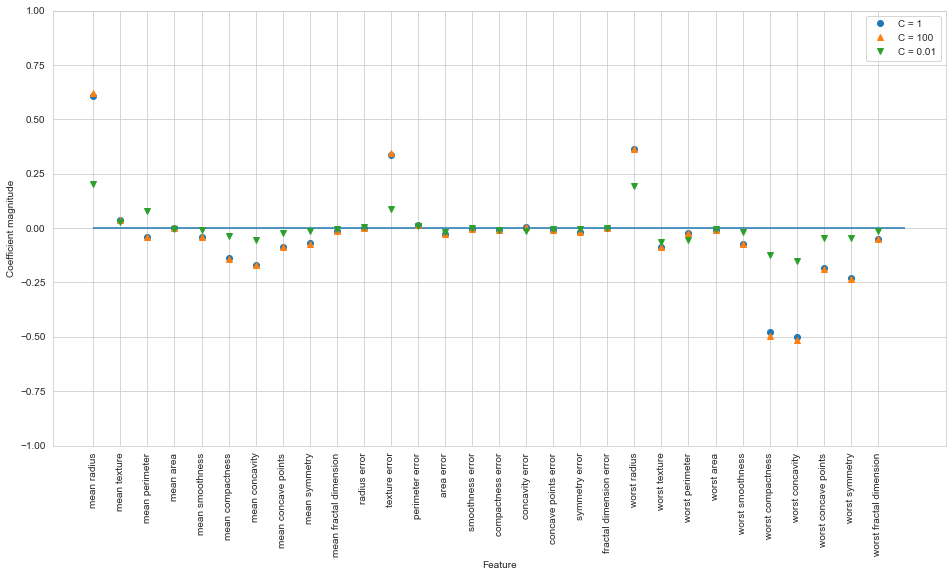

In [7]:
plt.figure(figsize = (16, 8))

plt.plot(Linear_svm.coef_.reshape(-1), "o", label = "C = 1")
plt.plot(Linear_svm100.coef_.reshape(-1), "^", label = "C = 100")
plt.plot(Linear_svm001.coef_.reshape(-1), "v", label = "C = 0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-1, 1)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 Linear_svm with C = 0.01:  0.93
Test accuracy of l1 Linear_svm with C = 0.01:  0.92
Training accuracy of l1 Linear_svm with C = 1.00:  0.97
Test accuracy of l1 Linear_svm with C = 1.00:  0.96
Training accuracy of l1 Linear_svm with C = 100.00:  0.99
Test accuracy of l1 Linear_svm with C = 100.00:  0.97


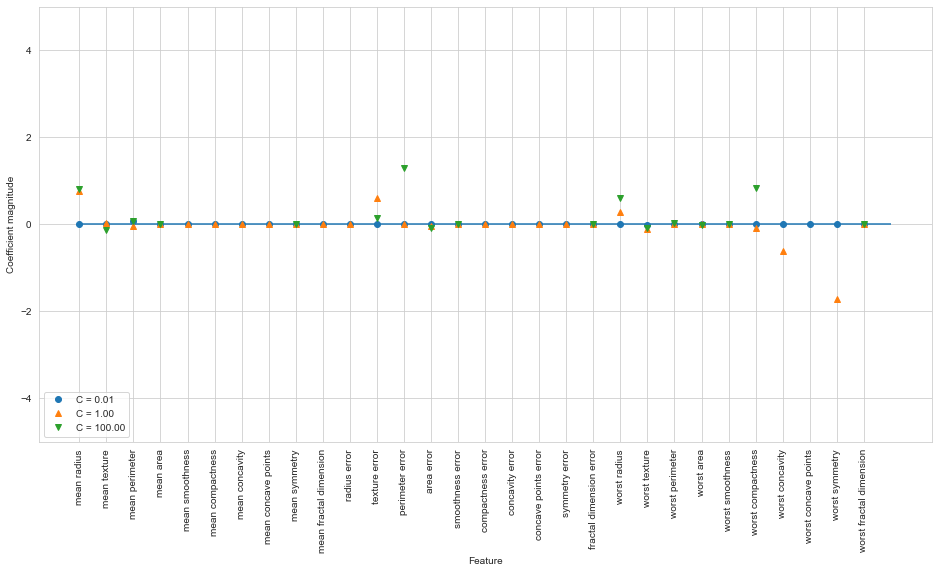

In [8]:
plt.figure(figsize = (16, 8))
for C, marker in zip([0.01, 1, 100], ["o", "^", "v"]):
    lr_l1 = LinearSVC(C = C, penalty = "l1", dual = False, max_iter = 100000).fit(X_train, y_train)
    print(f"Training accuracy of l1 Linear_svm with C = {C :.2f}: {lr_l1.score(X_train, y_train): .2f}")
    print(f"Test accuracy of l1 Linear_svm with C = {C :.2f}: {lr_l1.score(X_test, y_test): .2f}")
    plt.plot(lr_l1.coef_.reshape(-1), marker, label = f"C = {C:.2f}")


plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc = 3)

<h2>LinearSVCによる多クラス分類</h2>

In [9]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state = 42)
print(X.shape)
print(y.shape, np.unique(y))

(100, 2)
(100,) [0 1 2]


In [10]:
Linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", Linear_svm.coef_.shape) # 各クラスに対する係数ベクトル
print("Intercept shape:", Linear_svm.intercept_.shape) # 各クラスに対する切片

Coefficient shape:  (3, 2)
Intercept shape: (3,)


Text(0, 0.5, 'Feature 1')

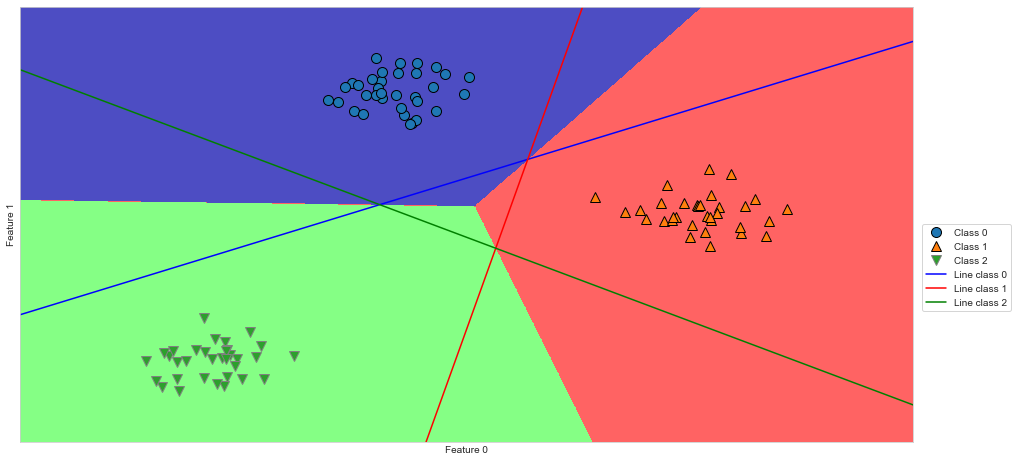

In [11]:
plt.figure(figsize = (16, 8))
mglearn.plots.plot_2d_classification(Linear_svm, X, fill = True, alpha = .7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(Linear_svm.coef_, Linear_svm.intercept_, ["b","r","g"]):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.legend(["Class 0","Class 1","Class 2","Line class 0","Line class 1","Line class 2"], loc = (1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

<h2>参考 : StandardScaler + loss="hinge"</h2>

In [12]:
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [13]:
iris = load_iris()
X = iris["data"][:, (2,3)]
y = (iris["target"] == 2).astype(np.float64)

In [14]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge"))
])

In [15]:
svm_clf0 = LinearSVC(C = 1, loss = "hinge").fit(X, y)
print(svm_clf0.score(X, y))

svm_clf.fit(X, y)
print(svm_clf.score(X, y))

0.96
0.9533333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<h1>非線形SVM分類器 : SVC</h1>

In [16]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

<h2>SVMはパラメータの設定とデータのスケールに敏感である</h2>

In [17]:
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)
print(f"Accuracy on training set: {svc.score(X_train, y_train): .2f}")
print(f"Accuracy on test set: {svc.score(X_test, y_test): .2f}")

Accuracy on training set:  0.92
Accuracy on test set:  0.92


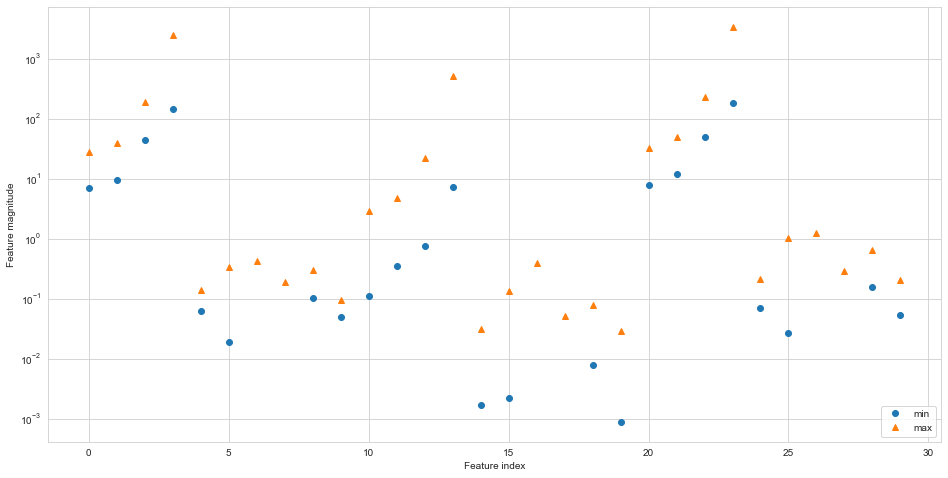

In [18]:
# cancerデータの特徴量はスケールが異なる
plt.figure(figsize = (16, 8))
plt.plot(X_train.min(axis = 0), "o", label = "min")
plt.plot(X_train.max(axis = 0), "^", label = "max")
plt.legend(loc = 4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [19]:
min_on_training = X_train.min(axis = 0)
range_on_training = (X_train - min_on_training).max(axis = 0)
X_train_scaled = (X_train - min_on_training) / range_on_training
print(f"Minimun for each feature\n{X_train_scaled.min(axis = 0)}")
print(f"Maximun for each feature\n{X_train_scaled.max(axis = 0)}")
X_test_scaled = (X_test - min_on_training) / range_on_training

Minimun for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximun for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [20]:
svc = SVC().fit(X_train_scaled, y_train)
print(f"Accuracy on training set: {svc.score(X_train_scaled, y_train): .3f}")
print(f"Accuracy on test set: {svc.score(X_test_scaled, y_test): .3f}")

Accuracy on training set:  0.979
Accuracy on test set:  0.979


In [21]:
svc = SVC(C = 10).fit(X_train_scaled, y_train)
print(f"Accuracy on training set: {svc.score(X_train_scaled, y_train): .3f}")
print(f"Accuracy on test set: {svc.score(X_test_scaled, y_test): .3f}")

Accuracy on training set:  0.991
Accuracy on test set:  0.979


<h3>ガウスRBFカーネル</h3>

In [22]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.15)

In [23]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "rbf", gamma = 5, C = 0.001))
])
rbf_kernel_svm_clf.fit(X, y)
rbf_kernel_svm_clf.score(X, y)

0.98

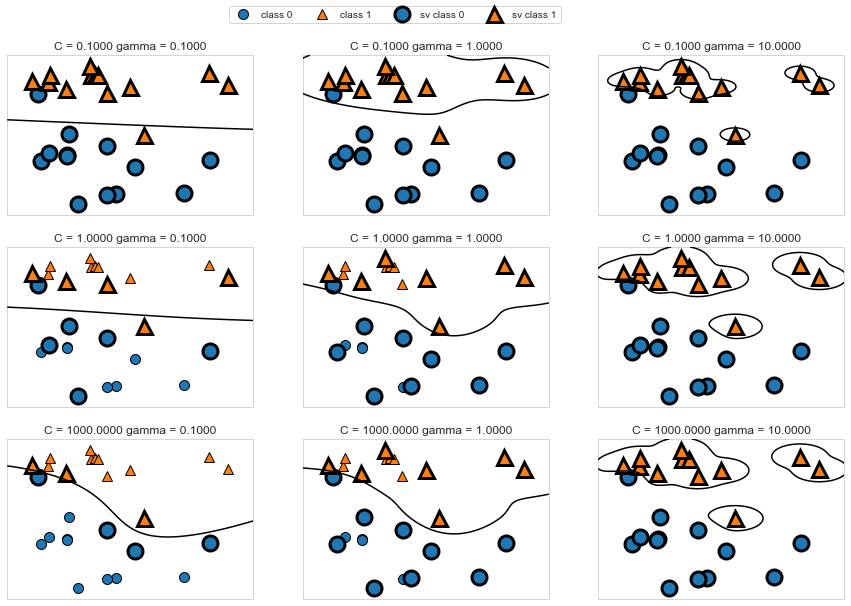

In [24]:
# ガウスRBFカーネルで、Cとgammaを変更した場合の動き
fig, axes = plt.subplots(3, 3, figsize = (15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax = a)

axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol = 4, loc = (.9, 1.2))

<h3>多項式カーネル</h3>

In [25]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "poly", degree = 3, coef0 = 1, C = 5))
])
poly_kernel_svm_clf.fit(X, y)
poly_kernel_svm_clf.score(X, y)

0.98

<h1>SVM回帰</h1>

<h2>LinearSVR(線形)</h2>

In [26]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [27]:
from sklearn.svm import LinearSVR

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

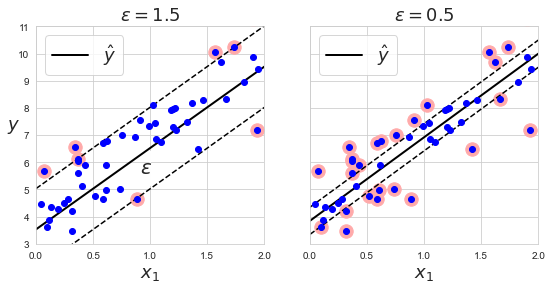

In [28]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

<h2>SVR(非線形)</h2>

In [29]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [30]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

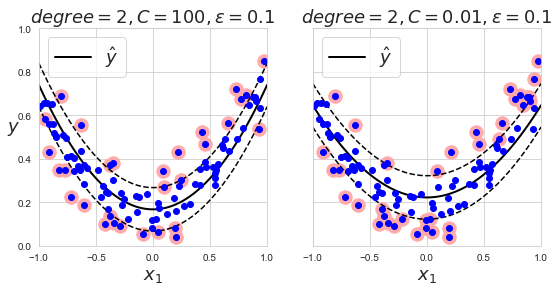

In [31]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()